In [1]:
#load essential libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df=pd.read_csv(r'C:\Users\heena\OneDrive\Documents\MH.csv')

In [3]:
#dimensions of dataset
df.shape

(1259, 27)

In [4]:
df.info

<bound method DataFrame.info of              Timestamp  Age  Gender         Country state self_employed  \
0      8/27/2014 11:29   37  Female   United States    IL           NaN   
1      8/27/2014 11:29   44       M   United States    IN           NaN   
2      8/27/2014 11:29   32    Male          Canada   NaN           NaN   
3      8/27/2014 11:29   31    Male  United Kingdom   NaN           NaN   
4      8/27/2014 11:30   31    Male   United States    TX           NaN   
...                ...  ...     ...             ...   ...           ...   
1254   9/12/2015 11:17   26    male  United Kingdom   NaN            No   
1255    9/26/2015 1:07   32    Male   United States    IL            No   
1256   11/7/2015 12:36   34    male   United States    CA            No   
1257  11/30/2015 21:25   46       f   United States    NC            No   
1258    2/1/2016 23:04   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  

In [5]:
df.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,8/27/2014 11:31,33,Male,United States,TN,NaN,Yes,No,Sometimes,25-Jun,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,8/27/2014 11:31,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,5-Jan,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,8/27/2014 11:32,39,M,Canada,NaN,NaN,No,No,Never,5-Jan,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,8/27/2014 11:32,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,8/27/2014 11:32,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [6]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [7]:
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
benefits                        0
Age                             0
Gender                          0
Country                         0
family_history                  0
treatment                       0
no_employees                    0
remote_work                     0
tech_company                    0
care_options                    0
obs_consequence                 0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
Timestamp                       0
dtype: int64

# We will be removing/ dropping certain columns with null values. comments, state can be dropped since they do not add value to our prediction.For work_interfere and self_emplyed (categorical data), we will use the most frequent category or mode of column to replace these null values.

In [8]:
df1 = df.drop(columns=['comments', 'state','Country','Timestamp','no_employees'])

In [9]:
df1.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [10]:
df1.shape

(1259, 22)

In [11]:
df1.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [12]:
df1.dtypes

Age                           int64
Gender                       object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [13]:
print(df1['self_employed'].unique())

[nan 'Yes' 'No']


In [14]:
df1.self_employed.mode()


0    No
dtype: object

In [15]:
print(df1['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [16]:
df1.work_interfere.mode()

0    Sometimes
dtype: object

In [17]:
df1['self_employed'] = df1['self_employed'].fillna('No')

In [18]:
df1['work_interfere'] = df1['work_interfere'].fillna('Sometimes')

In [19]:
df1.head(20)

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,No,No,No,Rarely,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,No,Yes,No,Sometimes,No,Yes,Yes,Not sure,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,No,Yes,Yes,Sometimes,Yes,Yes,No,No,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,M,No,No,No,Never,Yes,Yes,No,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,Female,No,Yes,Yes,Sometimes,No,Yes,Yes,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,No,No,No,Never,No,Yes,Don't know,No,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


# Now that we have filled null values, let us focus on some individual columns and clean them.

In [20]:
gender = df1['Gender'].str.lower()
print(df1['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [21]:
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df1.iterrows():

    if str.lower(col.Gender) in male:
        df1['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female:
        df1['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans:
        df1['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

print(df1['Gender'].unique())

['female' 'male' 'trans' 'A little about you' 'p']


In [22]:
rem = ['A little about you', 'p']
df1 = df1[~df1['Gender'].isin(rem)]
print(df1['Gender'].unique())

['female' 'male' 'trans']


In [23]:
df1.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [24]:
#Label Encoding (converting the labels into numeric form)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

labelDict = {}
for feature in df1:
    le = preprocessing.LabelEncoder()
    le.fit(df1[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df1[feature] = le.transform(df1[feature])
    
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

df1.head()

label_Age [-1726, -29, 5, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72, 329, 99999999999]
label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_coworkers ['No', 'Some of them', 'Yes']
label_supervisor ['No', 'S

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,23,0,0,0,1,1,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,30,1,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,18,1,0,0,0,2,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,17,1,0,1,1,1,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,17,1,0,0,0,0,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


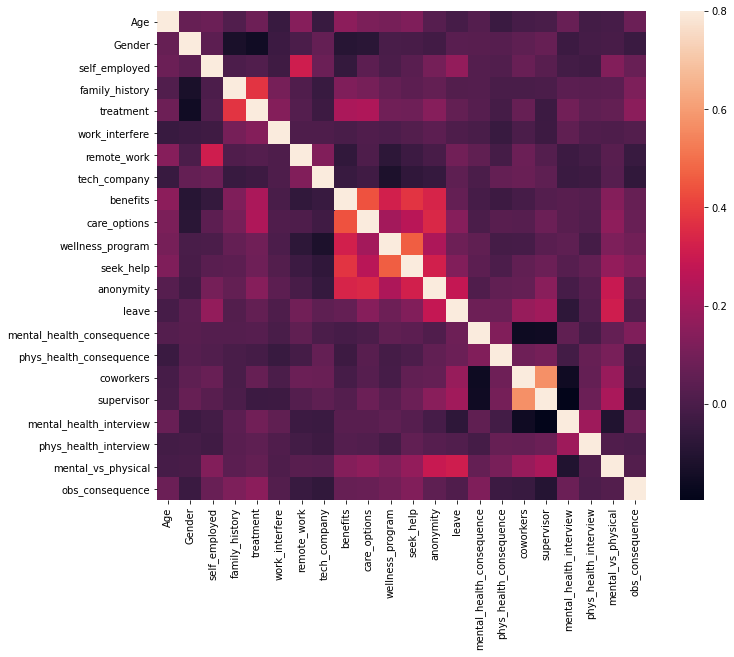

In [25]:
# Correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

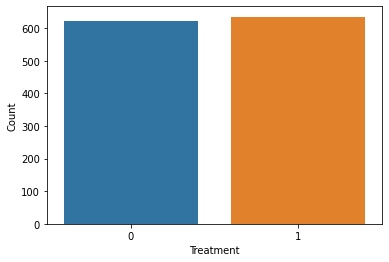

In [26]:
sns.countplot(x='treatment',data=df1)
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()

# Balanced data

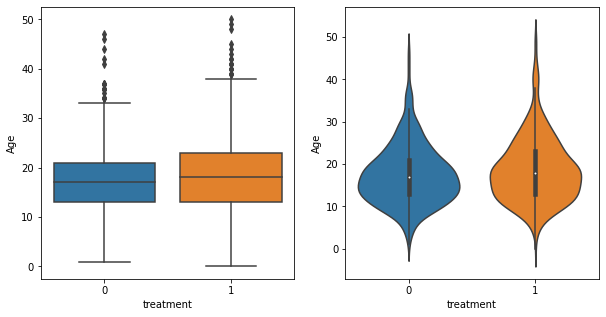

In [27]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="treatment", y="Age", data=df1)
plt.subplot(1,2,2)
sns.violinplot(x="treatment", y="Age", data=df1)
plt.show()

# Age of those who need treatment is seen to be slightly higher.

c:\users\heena\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\heena\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


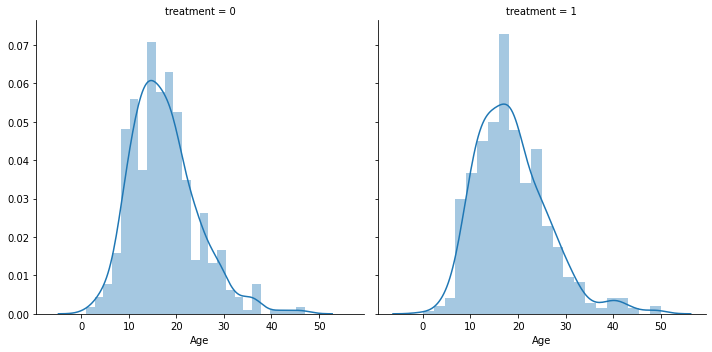

In [28]:
g = sns.FacetGrid(df1, col='treatment', height=5)
g = g.map(sns.distplot, "Age")

Text(0.5, 1.0, 'Treatment based on Gender')

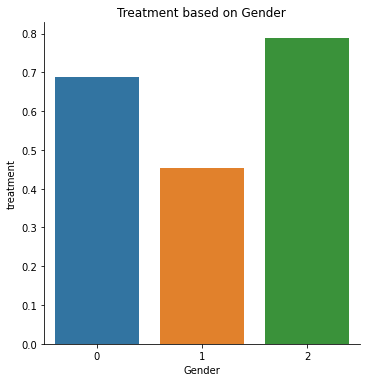

In [29]:
p=sns.catplot(x="Gender", y="treatment", data=df1,kind="bar",ci=None)
plt.title('Treatment based on Gender')

# Treatment requirement highest among trans gender.

Text(0.5, 1.0, 'How being self employed affects treatment requirements')

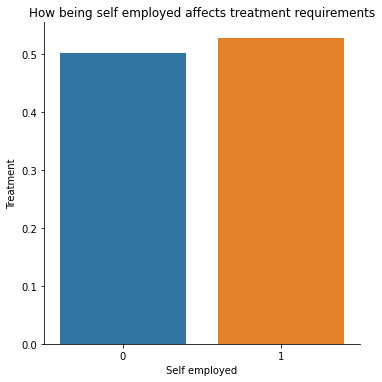

In [30]:
sns.catplot(x="self_employed", y="treatment", kind="bar", data=df1,ci=None)
plt.xlabel("Self employed")
plt.ylabel("Treatment")
plt.title("How being self employed affects treatment requirements")

#  Those who were self employed are more likely to need treatment. 

Text(0.5, 6.79999999999999, 'Family History')

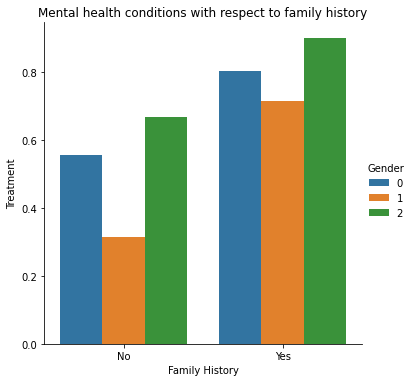

In [31]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=df1, kind="bar", ci=None, height=5, legend_out = True)
g.set_xticklabels(o)
plt.title('Mental health conditions with respect to family history')
plt.ylabel('Treatment')
plt.xlabel('Family History')


# Irrespective of family history of mental health conditions, need for treatment was more common among trans and was least among males. Also family history and treatment have strong correlation.

Text(0.5, 6.79999999999999, 'Work interfere')

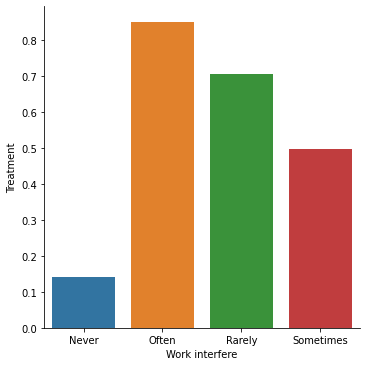

In [32]:
w = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", data=df1, kind="bar", ci=None, height=5, legend_out = True)
g.set_xticklabels(w)
plt.ylabel('Treatment')
plt.xlabel('Work interfere')

# Probability of treatment higher for those found that having a mental health condition does interfere with their work.

Text(0.5, 6.79999999999999, 'Care Options')

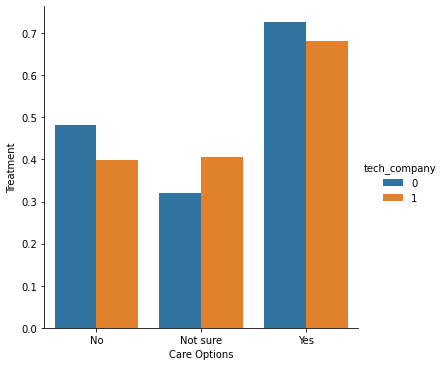

In [33]:
t = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="tech_company", data=df1, kind="bar", ci=None, height=5, legend_out = True)
g.set_xticklabels(t)
plt.ylabel('Treatment')
plt.xlabel('Care Options')


Text(0.5, 6.79999999999999, 'Wellness program')

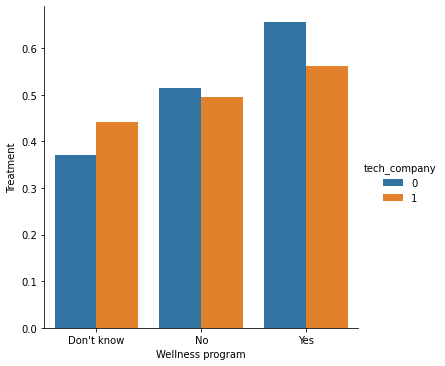

In [34]:
t = labelDict['label_wellness_program']
g = sns.catplot(x="wellness_program", y="treatment", hue="tech_company", data=df1, kind="bar", ci=None, height=5, legend_out = True)
g.set_xticklabels(t)
plt.ylabel('Treatment')
plt.xlabel('Wellness program')

Text(0.5, 6.79999999999999, 'Taking medical leave for a mental health condition')

<Figure size 1440x1440 with 0 Axes>

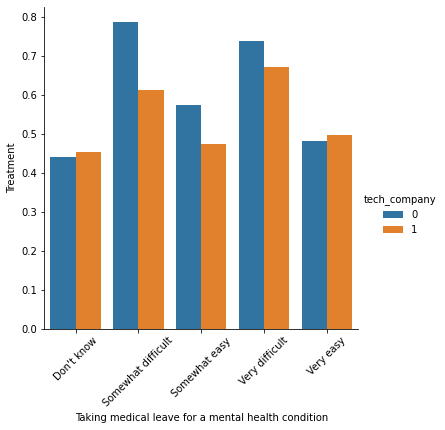

In [35]:
plt.figure(figsize=(20, 20))
ll = labelDict['label_leave']
g = sns.catplot(x="leave", y="treatment", hue="tech_company", data=df1, kind="bar", ci=None, height=5, legend_out = True)
g.set_xticklabels(ll,rotation=45)
plt.ylabel('Treatment')
plt.xlabel('Taking medical leave for a mental health condition')

Text(0.5, 6.79999999999999, 'Benefits')

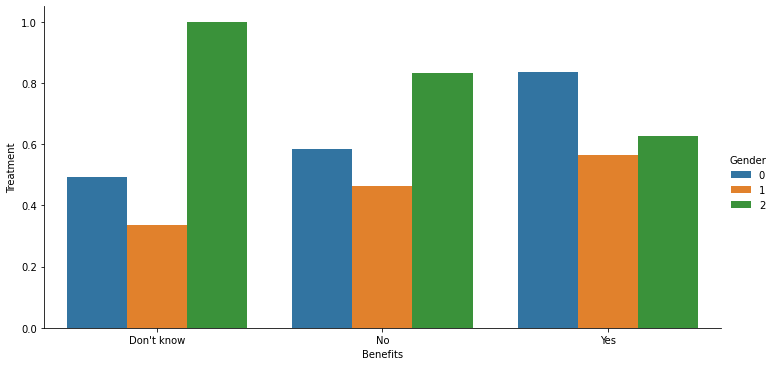

In [36]:
b = labelDict['label_benefits']
g = sns.catplot(x="benefits", y="treatment", hue="Gender", data=df1, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(b)
plt.ylabel('Treatment')
plt.xlabel('Benefits')


In [37]:
# Scaling column 'Age'
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Age'] = scaler.fit_transform(df1[['Age']])
df1.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.46,0,0,0,1,1,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,0.60,1,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.36,1,0,0,0,2,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,0.34,1,0,1,1,1,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,0.34,1,0,0,0,0,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


In [38]:
# Splitting data
X= df1.drop('treatment', axis= 1)
y= df1.treatment

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10, stratify= y)

In [39]:
# Finding the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model_data = []
listOfModels = [LogisticRegression(), KNeighborsClassifier(), SVC(), GradientBoostingClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

for model in listOfModels:
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    model_data.append([model.__class__.__name__, accuracy_score(y_test, y_pred)])
    
model_data_frame = pd.DataFrame(columns=["Model", "Accuracy_Score"], data=model_data)
print(model_data_frame.sort_values("Accuracy_Score"))
    

                        Model  Accuracy_Score
1        KNeighborsClassifier        0.646825
4      DecisionTreeClassifier        0.662698
0          LogisticRegression        0.730159
5      RandomForestClassifier        0.761905
2                         SVC        0.773810
3  GradientBoostingClassifier        0.777778


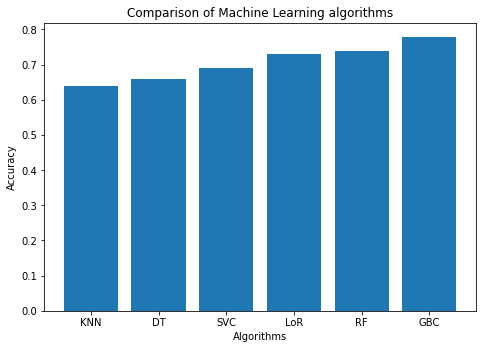

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['KNN','DT','SVC','LoR','RF','GBC']
accuracy = [0.64,0.66,0.69,0.73,0.74,0.78]
ax.bar(models, accuracy)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Algorithms')
ax.set_title('Comparison of Machine Learning algorithms')
plt.show()

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV for hyperparameter tuning
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]


# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,6,7,8,9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9]

# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ["gini", "entropy"]

In [42]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
             "criterion": ["gini", "entropy"]}

In [43]:
#using the random grid to search for best hyperparameters
#creating the base model to tune
rf = RandomForestClassifier()

#random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
model_1 = RandomizedSearchCV(rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

#fitting the random search mode
model_1.fit(X_train, y_train)

model_1.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 1,
 'criterion': 'gini',
 'bootstrap': False}

In [44]:
model_1b = RandomForestClassifier(**{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': 88,
 'criterion':'entropy',
 'bootstrap': True})

model_1b.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=88, min_samples_leaf=9,
                       min_samples_split=5, n_estimators=1200)

In [45]:
pred = model_1b.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report


# Accuracy Score
score = round(accuracy_score(y_test, pred),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 78.17%


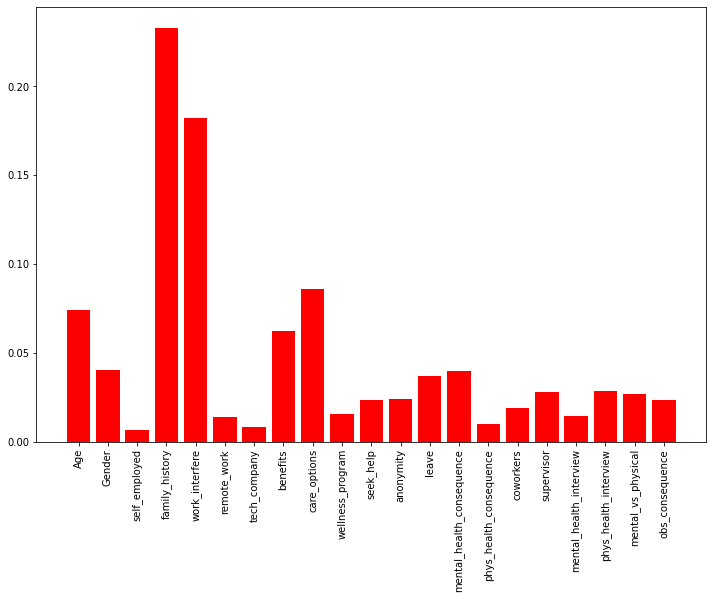

In [47]:
#Plotting feature importances
fig, ax = plt.subplots(figsize=(12,8))
bar_rects = ax.bar(np.arange(21), model_1b.feature_importances_, color='r', align='center')
ax.xaxis.set_ticks(np.arange(21))
ax.set_xticklabels(X.columns, rotation='vertical')
plt.show()

In [48]:
cm = confusion_matrix(y_test, pred)
cm

array([[ 96,  29],
       [ 26, 101]], dtype=int64)

In [49]:
FP=cm[0,1]
TN=cm[0,0]
false_positive_rate = FP / float(TN + FP)
print('False Positive Rate:', false_positive_rate)
    

False Positive Rate: 0.232


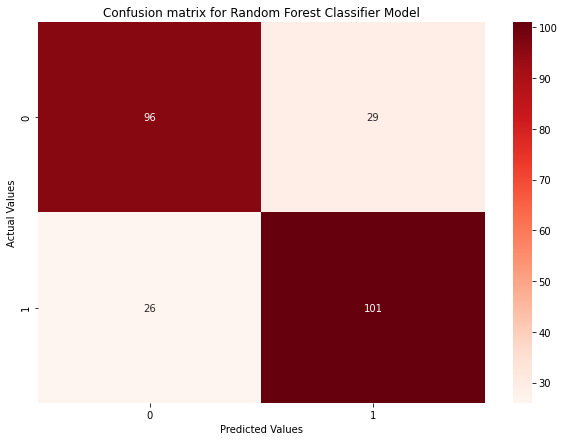

In [50]:
#Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [51]:
from sklearn import metrics
print('Precision:', metrics.precision_score(y_test, pred))    

Precision: 0.7769230769230769


In [52]:
from sklearn import metrics
print('Classification Error:', 1 - metrics.accuracy_score(y_test, pred))
   

Classification Error: 0.21825396825396826


In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       125
           1       0.78      0.80      0.79       127

    accuracy                           0.78       252
   macro avg       0.78      0.78      0.78       252
weighted avg       0.78      0.78      0.78       252



In [54]:
print('AUC Score:', metrics.roc_auc_score(y_test, pred))

AUC Score: 0.7816377952755905


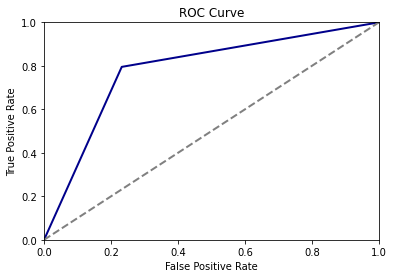

In [56]:
from sklearn.metrics import roc_curve
roc_auc = metrics.roc_auc_score(y_test, pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
def plot_roc():
    plt.plot(fpr, tpr, linewidth = 2, color="darkblue", label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2,color="grey")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
fpr, tpr, t = roc_curve(y_test, pred)
plot_roc()

# Gradient Boosting Classifier

In [57]:
#Randomized Search CV for hyperparameter tuning
#Number of trees 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]


# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,6,7,8,9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9]



param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

gbc = GradientBoostingClassifier()

#random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
model_2 = RandomizedSearchCV(gbc, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

#fitting the random search mode
model_2.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.5min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [58]:
model_2.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1}

In [59]:
model_2b = GradientBoostingClassifier(**{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1})

model_2b.fit(X_train, y_train)
pred_2 = model_2b.predict(X_test)

In [60]:
score = round(accuracy_score(y_test, pred_2),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 76.19%


In [61]:
cm = confusion_matrix(y_test, pred_2)
cm

array([[96, 29],
       [31, 96]], dtype=int64)

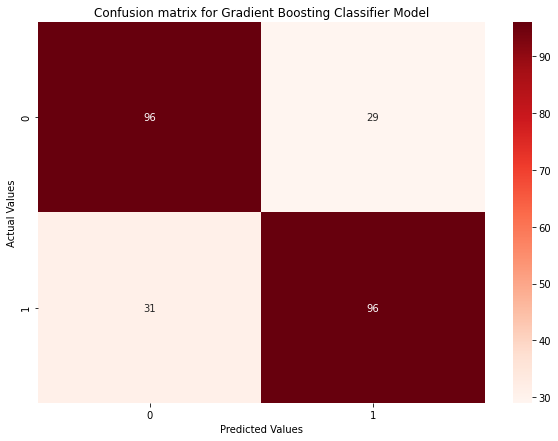

In [62]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix for Gradient Boosting Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [63]:
from sklearn import metrics
print('Precision:', metrics.precision_score(y_test, pred_2))   

Precision: 0.768


In [64]:
from sklearn import metrics
print('Classification Error:', 1 - metrics.accuracy_score(y_test, pred_2))

Classification Error: 0.23809523809523814


In [65]:
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       125
           1       0.77      0.76      0.76       127

    accuracy                           0.76       252
   macro avg       0.76      0.76      0.76       252
weighted avg       0.76      0.76      0.76       252



In [66]:
print('AUC Score:', metrics.roc_auc_score(y_test, pred_2))

AUC Score: 0.7619527559055118


In [67]:
from sklearn.model_selection import cross_val_score
print('Cross-validated AUC:', cross_val_score(model_2b, X, y, cv=10, scoring='roc_auc').mean())

Cross-validated AUC: 0.8094208600779021


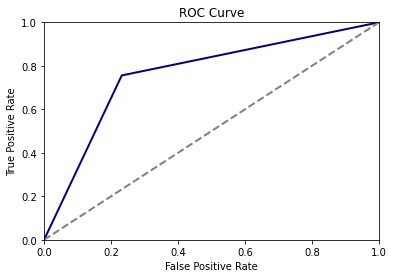

In [68]:
roc_auc = metrics.roc_auc_score(y_test, pred_2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_2)
def plot_roc():
    plt.plot(fpr, tpr, linewidth = 2, color="darkblue", label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2,color="grey")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
fpr, tpr, t = roc_curve(y_test, pred_2)
plot_roc()

# LoR

In [69]:
#Logictic Regression
#using grid search for hyper parameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

lor = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#defining search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1,10, 20, 100]

model_3= GridSearchCV(lor, space, scoring='accuracy', n_jobs=-1, cv=cv)

model_3.fit(X_train, y_train)
model_3.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [70]:
from sklearn.metrics import accuracy_score

model_3b=LogisticRegression(**{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'})
model_3b.fit(X_train, y_train)
pred_3 = model_3b.predict(X_test)

# Accuracy Score
score = round(accuracy_score(y_test, pred_3),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 73.41%


In [71]:
cm = confusion_matrix(y_test, pred_3)
cm

array([[95, 30],
       [37, 90]], dtype=int64)

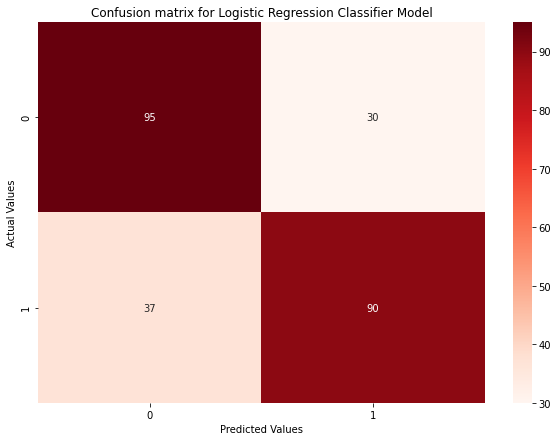

In [72]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix for Logistic Regression Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [73]:
from sklearn import metrics
print('Precision:', metrics.precision_score(y_test, pred_3))   

Precision: 0.75


In [74]:
from sklearn import metrics
print('Classification Error:', 1 - metrics.accuracy_score(y_test, pred_3))

Classification Error: 0.2658730158730159


In [75]:
print(classification_report(y_test,pred_3))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       125
           1       0.75      0.71      0.73       127

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252



In [76]:
print('AUC Score:', metrics.roc_auc_score(y_test, pred_3))

AUC Score: 0.7343307086614174


In [77]:
from sklearn.model_selection import cross_val_score
print('Cross-validated AUC:', cross_val_score(model_3b, X, y, cv=10, scoring='roc_auc').mean())

Cross-validated AUC: 0.7664927063268557


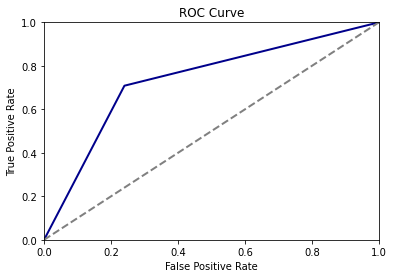

In [78]:
roc_auc = metrics.roc_auc_score(y_test, pred_3)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_3)
def plot_roc():
    plt.plot(fpr, tpr, linewidth = 2, color="darkblue", label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2,color="grey")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
fpr, tpr, t = roc_curve(y_test, pred_3)
plot_roc()

# DNN

In [79]:
import tensorflow as tf


batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

def train_input_fn(features, labels, batch_size):
 
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):

    features=dict(features)
    if labels is None:
  
        inputs = features
    else:
        inputs = (features, labels)

   
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    
    return dataset

In [80]:
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

In [81]:
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    optimizer=tf.optimizers.Adam(
                                      learning_rate=0.1,
                                
                                    ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\heena\\AppData\\Local\\Temp\\tmpzstorj_f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [82]:
model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into

In [83]:
methodDict = {}
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

accuracy = eval_result['accuracy'] * 100
methodDict['NN DNNClasif.'] = accuracy

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-03-25T03:37:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\heena\AppData\Local\Temp\tmpzstorj_f\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.67394s
INFO:tensorflow:Finished evaluation at 2021-03-25-03:37:54
INFO:tensorflow:Saving dict for global step 1000: 

In [87]:
predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=batch_size)))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\heena\AppData\Local\Temp\tmpzstorj_f\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [88]:
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

col1 = []
col2 = []
col3 = []


for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter
    
   
    #print(template.format(idx, v, 100 * probability, input))


results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

,index,prediction,expected
0,159,1,1
1,435,0,0
2,554,1,1
3,985,0,1
4,933,1,1


In [90]:
results = pd.DataFrame({'Treatment': pred})

results.to_csv('results.csv', index=False)
results.head(20)

,Treatment
0,0
1,1
2,0
3,1
4,1
5,1
6,0
7,0
8,0
9,1
